# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('CarPrice_Assignment.csv')

# Exploratory data analysis

In [2]:
# Checking the shape
df.shape

(205, 26)

In [3]:
# Checking first 5 rows 
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Let's optimize the memory using appropriate data types
int_cols = df.select_dtypes(include = np.int64)
df[int_cols.columns] = df[int_cols.columns].astype(np.int32)

float_cols = df.select_dtypes(include = np.float64)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [6]:
# Checking null values
df.isnull().mean()*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [7]:
# Checking any duplicated values
df.duplicated().sum()

0

In [8]:
# For getting descriptive statistical information
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756584,174.049271,65.907806,53.724876,2555.565854,126.907317,3.329756,3.255414,10.142536,104.117073,5125.121951,25.219512,30.751220,13276.710938
std,59.322565,1.245307,6.021776,12.337288,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852051
min,1.000000,-2.000000,86.599998,141.100006,60.299999,47.799999,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300003,64.099998,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.199997,65.500000,54.099998,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400002,183.100006,66.900002,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900002,208.100006,72.300003,59.799999,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

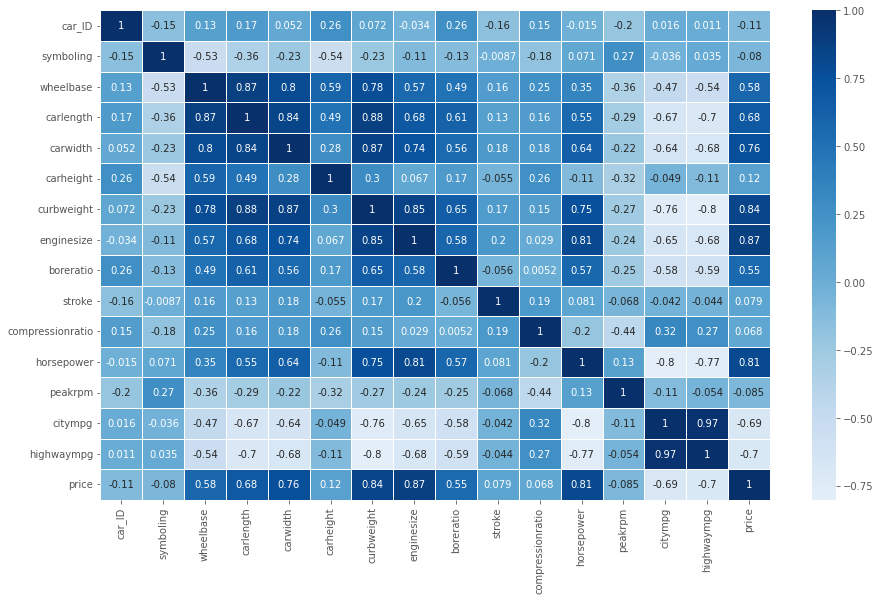

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

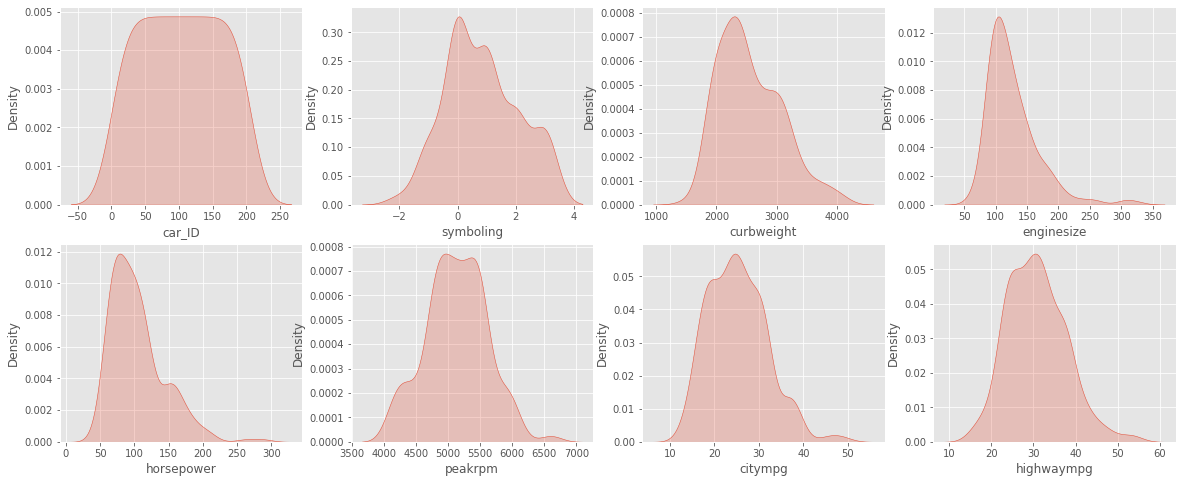

In [10]:
# Let's check the outliers, and for checking the outliers we first need to see the distribution of the every numerical variable
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.kdeplot(df['car_ID'],shade=True,ax = ax[0][0])
sns.kdeplot(df['symboling'],shade=True,ax = ax[0][1])
sns.kdeplot(df['curbweight'],shade=True,ax = ax[0][2])
sns.kdeplot(df['enginesize'],shade=True,ax = ax[0][3])
sns.kdeplot(df['horsepower'],shade=True,ax = ax[1][0])
sns.kdeplot(df['peakrpm'],shade=True,ax = ax[1][1])
sns.kdeplot(df['citympg'],shade=True,ax = ax[1][2])
sns.kdeplot(df['highwaympg'],shade=True,ax = ax[1][3])

<AxesSubplot:xlabel='highwaympg'>

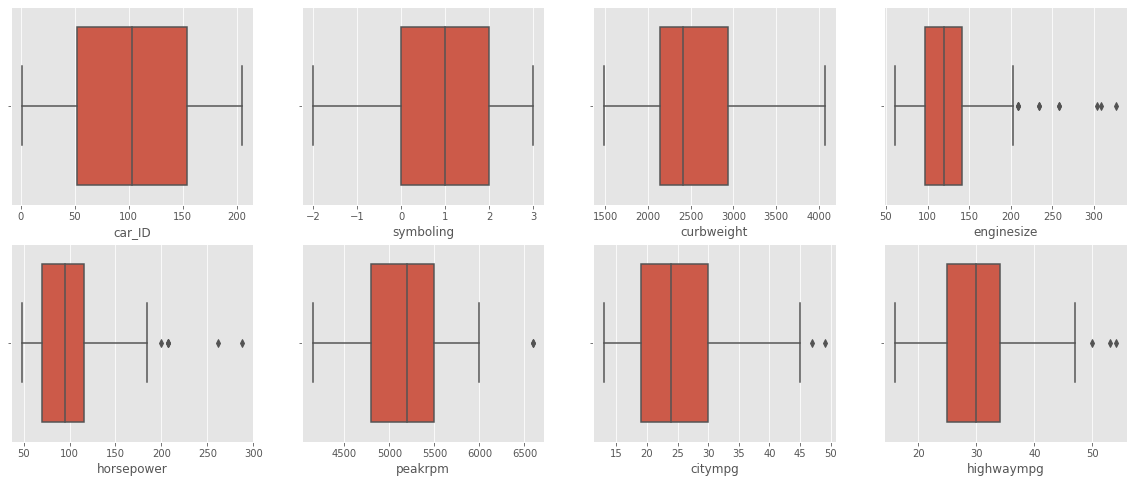

In [11]:
# Let's plot boxplots
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.boxplot(x = df['car_ID'],ax = ax[0][0])
sns.boxplot(x = df['symboling'],ax = ax[0][1])
sns.boxplot(x = df['curbweight'],ax = ax[0][2])
sns.boxplot(x = df['enginesize'],ax = ax[0][3])
sns.boxplot(x = df['horsepower'],ax = ax[1][0])
sns.boxplot(x = df['peakrpm'],ax = ax[1][1])
sns.boxplot(x = df['citympg'],ax = ax[1][2])
sns.boxplot(x = df['highwaympg'],ax = ax[1][3])

<AxesSubplot:xlabel='price', ylabel='Density'>

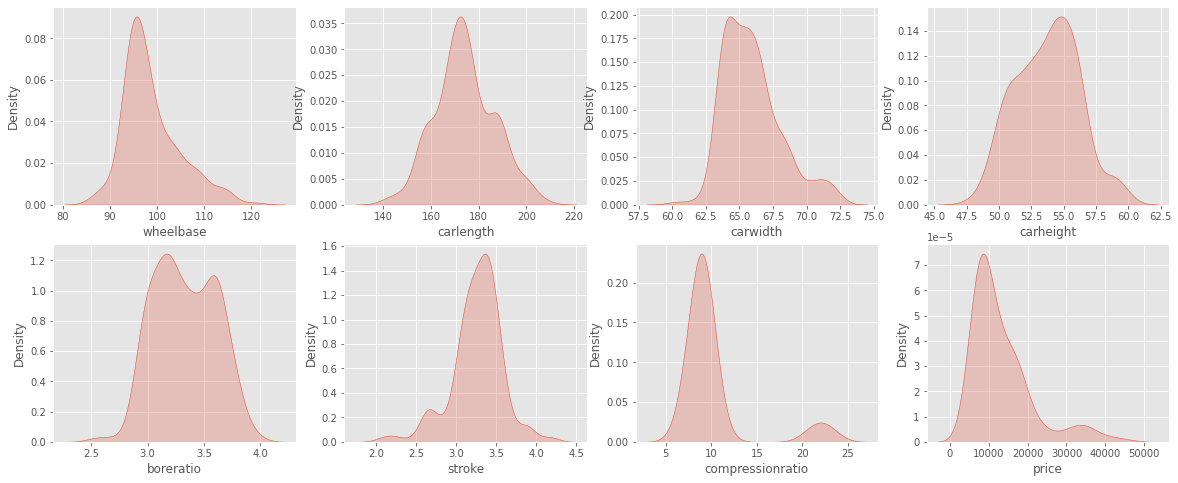

In [12]:
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.kdeplot(df['wheelbase'],shade=True,ax = ax[0][0])
sns.kdeplot(df['carlength'],shade=True,ax = ax[0][1])
sns.kdeplot(df['carwidth'],shade=True,ax = ax[0][2])
sns.kdeplot(df['carheight'],shade=True,ax = ax[0][3])
sns.kdeplot(df['boreratio'],shade=True,ax = ax[1][0])
sns.kdeplot(df['stroke'],shade=True,ax = ax[1][1])
sns.kdeplot(df['compressionratio'],shade=True,ax = ax[1][2])
sns.kdeplot(df['price'],shade=True,ax = ax[1][3])

<AxesSubplot:xlabel='price'>

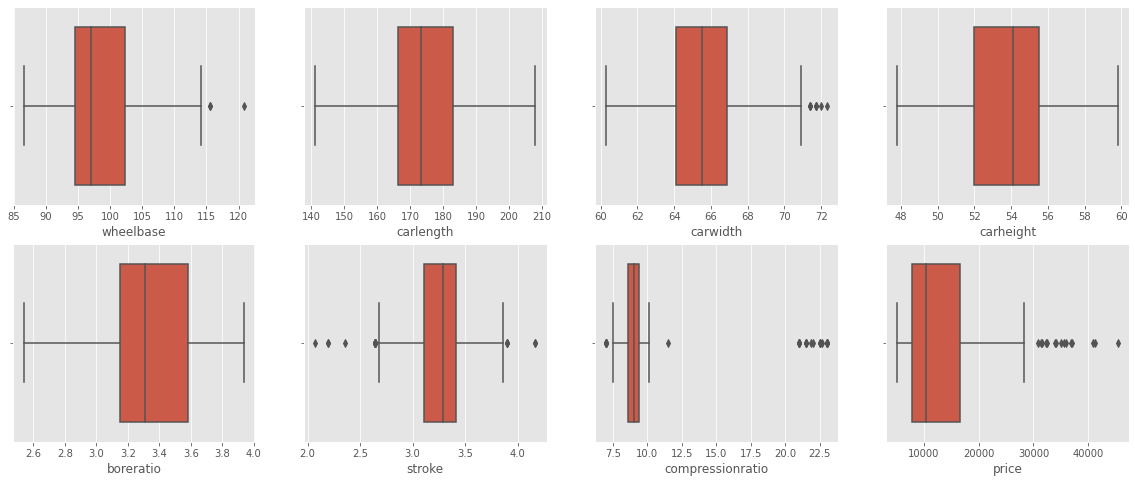

In [13]:
# Let's plot boxplots
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.boxplot(x = df['wheelbase'],ax = ax[0][0])
sns.boxplot(x = df['carlength'],ax = ax[0][1])
sns.boxplot(x = df['carwidth'],ax = ax[0][2])
sns.boxplot(x = df['carheight'],ax = ax[0][3])
sns.boxplot(x = df['boreratio'],ax = ax[1][0])
sns.boxplot(x = df['stroke'],ax = ax[1][1])
sns.boxplot(x = df['compressionratio'],ax = ax[1][2])
sns.boxplot(x = df['price'],ax = ax[1][3])

Out of all the numerical features below mentioned features have outliers 
1. enginesize 
2. horsepower
3. peakrpm
4. citympg 
5. highwaympg
6. wheelbase
7. carlength
8. carwidth
9. stroke
10. compressionratio
11. price 

Now to handle these outliers we will can either remove them or we can cap them, but first of all we will cap the outliers to see if there is any major change in the distribution. If the distribution will change a lot then we will simply remove the outliers from the features in which distribution is changing.

In [14]:
temp_df = df.copy()

In [15]:
# let's create a function to find the lower and upper limit 
def find_upper_and_lower_lmt(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + (1.5*IQR)
    Lower_lmt = q1 - (1.5*IQR)
    return [Upper_lmt,Lower_lmt]

In [16]:
cols_with_outliers = ['enginesize','horsepower','peakrpm', 'citympg', 'highwaympg','price','wheelbase','carlength',
                      'carwidth','stroke','compressionratio']

In [17]:
# Let's cap the outliers
for col in cols_with_outliers:
    lmts = find_upper_and_lower_lmt(temp_df[col])
    temp_df[col] = np.where(temp_df[col] > lmts[0],lmts[0],
    np.where(
        temp_df[col] < lmts[1],lmts[1],temp_df[col] ))

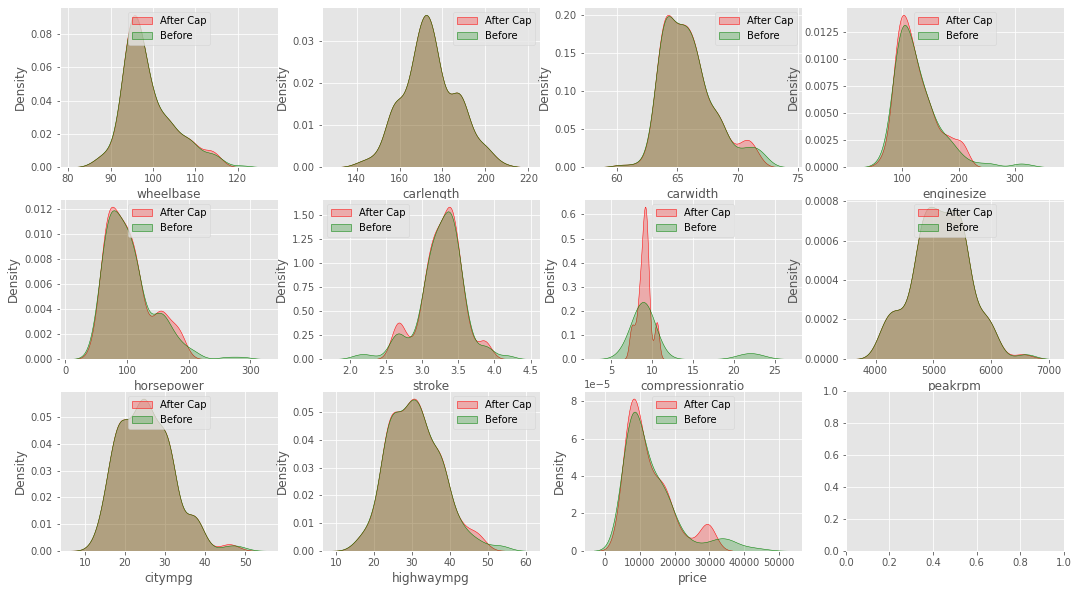

In [18]:
# Let's check the change in distribution before and after capping
fig,ax = plt.subplots(3,4,figsize = (18,10))

sns.kdeplot(temp_df['wheelbase'],shade = True,ax = ax[0][0] ,color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['wheelbase'],shade = True,ax = ax[0][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['carlength'],shade = True,ax = ax[0][1],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['carlength'],shade = True,ax = ax[0][1],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['carwidth'],shade = True,ax = ax[0][2],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['carwidth'],shade = True,ax = ax[0][2],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['enginesize'],shade = True,ax = ax[0][3],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['enginesize'],shade = True,ax = ax[0][3],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['horsepower'],shade = True,ax = ax[1][0],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['horsepower'],shade = True,ax = ax[1][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['stroke'],shade = True,ax = ax[1][1],color = 'red',label='After Cap').legend(loc='upper left')
sns.kdeplot(df['stroke'],shade = True,ax = ax[1][1],color = 'green',label='Before').legend(loc='upper left')

sns.kdeplot(temp_df['compressionratio'],ax = ax[1][2],shade=True,color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['compressionratio'],shade=True,ax = ax[1][2],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['peakrpm'],shade = True,ax = ax[1][3],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['peakrpm'],shade = True,ax = ax[1][3],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['citympg'],shade = True,ax = ax[2][0],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['citympg'],shade = True,ax = ax[2][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['highwaympg'],shade = True,ax = ax[2][1],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['highwaympg'],shade = True,ax = ax[2][1],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['price'],shade = True,ax = ax[2][2],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['price'],shade = True,ax = ax[2][2],color = 'green',label='Before').legend(loc='upper center')

In stroke, enginesize, stroke, compressionratio and price features the distribution seems to change a bit more thus let's try removing the outliers

In [19]:
# Creating a temporary data frame to first test the distribution by removing the outliers
Temp_df = df.copy()

In [20]:
# Let's remove the outliers
remove_outliers_cols = ['price','stroke','compressionratio','enginesize']
for col in remove_outliers_cols:
    lmts = find_upper_and_lower_lmt(Temp_df[col])
    Temp_df[col] = Temp_df[col][(Temp_df[col] < lmts[0]) & (Temp_df[col] > lmts[1])]

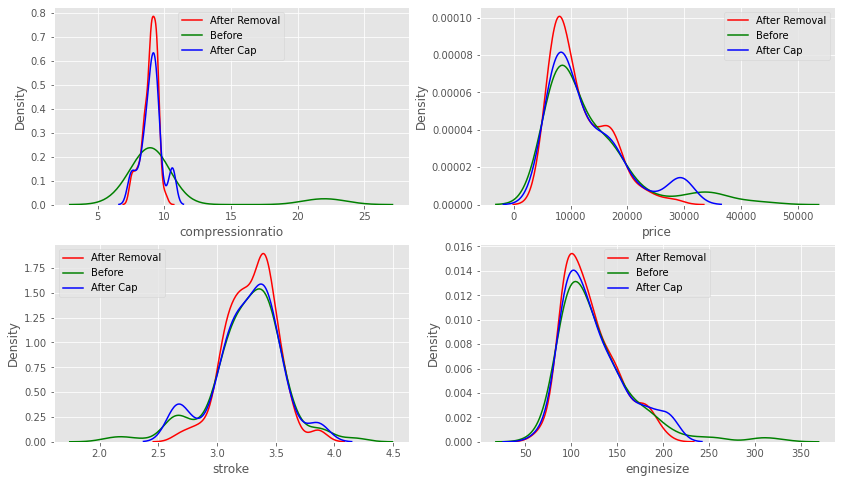

In [21]:
# Let's check the change in distribution before and after removing the outliers
fig,ax = plt.subplots(2,2,figsize = (14,8))

sns.kdeplot(Temp_df['compressionratio'],shade = False,ax = ax[0][0] ,color = 'red',label='After Removal').legend(loc='upper center')
sns.kdeplot(df['compressionratio'],shade = False,ax = ax[0][0],color = 'green',label='Before').legend(loc='upper center')
sns.kdeplot(temp_df['compressionratio'],ax = ax[0][0],shade=False,color = 'blue',label='After Cap').legend(loc='upper center')

sns.kdeplot(Temp_df['price'],shade = False,ax = ax[0][1],color = 'red',label='After Removal').legend(loc='upper right')
sns.kdeplot(df['price'],shade = False,ax = ax[0][1],color = 'green',label='Before').legend(loc='upper right')
sns.kdeplot(temp_df['price'],shade = False,ax = ax[0][1],color = 'blue',label='After Cap').legend(loc='upper right')

sns.kdeplot(Temp_df['stroke'],shade = False,ax = ax[1][0],color = 'red',label='After Removal').legend(loc='upper left')
sns.kdeplot(df['stroke'],shade = False,ax = ax[1][0],color = 'green',label='Before').legend(loc='upper left')
sns.kdeplot(temp_df['stroke'],shade = False,ax = ax[1][0],color = 'blue',label='After Cap').legend(loc='upper left')

sns.kdeplot(Temp_df['enginesize'],shade = False,ax = ax[1][1],color = 'red',label='After Removal').legend(loc='upper center')
sns.kdeplot(df['enginesize'],shade = False,ax = ax[1][1],color = 'green',label='Before').legend(loc='upper center')
sns.kdeplot(temp_df['enginesize'],shade = False,ax = ax[1][1],color = 'blue',label='After Cap').legend(loc='upper center')

As we can see that in all the feature after removing outliers the distribution is chaning more than capping,thus we will cap all features in which there are some outliers

In [22]:
# Let's cap the outliers in the original dataframe
for col in cols_with_outliers:
    lmts = find_upper_and_lower_lmt(df[col])
    df[col] = np.where(df[col] > lmts[0],lmts[0],
    np.where(
        df[col] < lmts[1],lmts[1],df[col] ))

<AxesSubplot:>

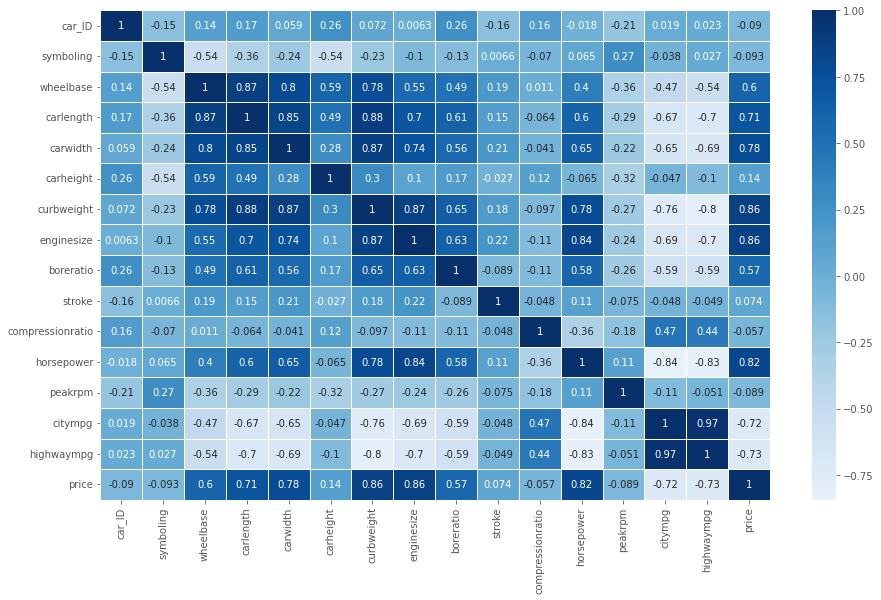

In [23]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

After removing the outliers, the correlation between the variables have increased as compared to the original dataframe

# Data preprocessing

In [24]:
# Droping the unnecessary feature
df.drop(['car_ID'],axis=1,inplace=True)

In [43]:
df.select_dtypes(include='object').head(4)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Brand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi


In [31]:
# Let's derive brand names from the CarName feature
df['Brand'] = [item.split(' ')[0] for item in df['CarName']] 
df.drop(['CarName'],axis=1,inplace=True)

In [42]:
# Transforming wrong brand names to correct ones
df['Brand'].replace(to_replace = 'maxda',value='mazda',inplace=True)
df['Brand'].replace(to_replace = 'porcshce',value='porsche',inplace=True)
df['Brand'].replace(to_replace = 'nissan',value='Nissan',inplace=True)
df['Brand'].replace(to_replace = ['vokswagen','vw'],value='volkswagen',inplace=True)
df['Brand'].replace(to_replace = 'toyouta',value='toyota',inplace=True)

In [64]:
F_type = []
for i in df['fueltype']:
    if i =='gas':
        F_type.append(0)
    else:
        F_type.append(1)
F_type = pd.DataFrame(F_type,columns=['Fuel_type'])
df = pd.concat([df,F_type],axis=1)
df = df.drop(['fueltype'],axis=1)

In [65]:
asp_type = []
for i in df['aspiration']:
    if i =='std':
        asp_type.append(0)
    else:
        asp_type.append(1)
asp_type = pd.DataFrame(asp_type,columns=['Aspiration'])
df = pd.concat([df,asp_type],axis=1)
df = df.drop(['aspiration'],axis=1)

In [66]:
eloc = []
for i in df['enginelocation']:
    if i =='front':
        eloc.append(0)
    else:
        eloc.append(1)
eloc = pd.DataFrame(eloc,columns=['Engline_loc'])
df = pd.concat([df,eloc],axis=1)
df = df.drop(['enginelocation'],axis=1)

In [67]:
d_num = []
for i in df['doornumber']:
    if i =='four':
        d_num.append(0)
    elif i =='two':
        d_num.append(1)
d_num = pd.DataFrame(d_num,columns=['Doors'])
df = pd.concat([df,d_num],axis=1)
df = df.drop(['doornumber'],axis=1)

In [68]:
cb = []
for i in df['carbody']:
    if i == 'hatchback':
        cb.append(0)
    elif i == 'sedan':
        cb.append(1)
    elif i == 'wagon':
        cb.append(2)
    elif i == 'hardtop':
        cb.append(3)
    elif i == 'convertible':
        cb.append(4)
    else:
        cb.append(5)

cb = pd.DataFrame(cb,columns=['Car_body'])
df = pd.concat([df,cb],axis=1)
df = df.drop(['carbody'],axis=1)

In [69]:
cn = []
for i in df['cylindernumber']:
    if i == 'two':
        cn.append(0)
    elif i == 'three':
        cn.append(1)
    elif i == 'four':
        cn.append(2)
    elif i == 'five':
        cn.append(3)
    elif i == 'six':
        cn.append(4)
    elif i == 'eight':
        cn.append(5)
    elif i == 'twelve':
        cn.append(6)

cn = pd.DataFrame(cn,columns=['Cylinders'])
df = pd.concat([df,cn],axis=1)
df = df.drop(['cylindernumber'],axis=1)

In [70]:
en_type = []
for i in df['enginetype']:
    if i == 'ohc':
        en_type.append(0)
    elif i == 'dohc':
        en_type.append(1)
    elif i == 'ohcv':
        en_type.append(2)
    elif i == 'dohcv':
        en_type.append(3)
    elif i == 'ohcf':
        en_type.append(4)
    elif i == 'l':
        en_type.append(5)
    elif i == 'rotor':
        en_type.append(6)
        
en_type = pd.DataFrame(en_type,columns=['Engine_type'])
df = pd.concat([df,en_type],axis=1)
df = df.drop(['enginetype'],axis=1)

In [71]:
f_sys = []
for i in df['fuelsystem']:
    if i == 'mpfi':
        f_sys.append(0)
    elif i == 'mfi':
        f_sys.append(1)
    elif i == 'spfi':
        f_sys.append(2)
    elif i == 'idi':
        f_sys.append(3)
    elif i == '2bbl':
        f_sys.append(4)
    elif i == '1bbl':
        f_sys.append(5)
    elif i == '4bbl':
        f_sys.append(6)
    elif i == 'spdi':
        f_sys.append(7)

f_sys = pd.DataFrame(f_sys,columns=['Fuel_system'])
df = pd.concat([df,f_sys],axis=1)
df = df.drop(['fuelsystem'],axis=1)

In [72]:
d_wheel = []
for i in df['drivewheel']:
    if i =='fwd':
        d_wheel.append(0)
    elif i =='4wd':
        d_wheel.append(1)
    elif i =='rwd':
        d_wheel.append(2)
d_wheel = pd.DataFrame(d_wheel,columns=['Drive_wheel'])
df = pd.concat([df,d_wheel],axis=1)
df = df.drop(['drivewheel'],axis=1)

In [73]:
df['Brand'] = [car.split(' ')[0] for car in df['CarName']]
df = df.drop(['CarName'],axis=1)

<AxesSubplot:>

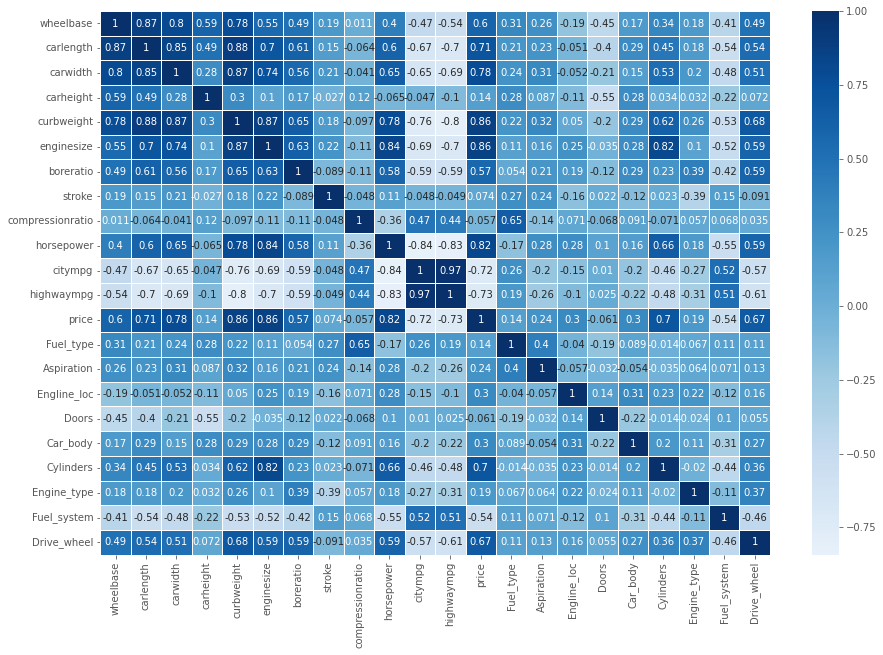

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

In [75]:
# under survillience : compression,fuetype,engine_location
df = df.drop(['stroke'],axis=1)
df = pd.get_dummies(df,columns=['Brand'])

In [76]:
col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'Fuel_type', 'Aspiration', 'Engline_loc', 'Doors',
       'Car_body', 'Cylinders', 'Engine_type', 'Fuel_system', 'Drive_wheel',
       'Brand_Nissan', 'Brand_alfa-romero', 'Brand_audi', 'Brand_bmw',
       'Brand_buick', 'Brand_chevrolet', 'Brand_dodge', 'Brand_honda',
       'Brand_isuzu', 'Brand_jaguar', 'Brand_maxda', 'Brand_mazda',
       'Brand_mercury', 'Brand_mitsubishi', 'Brand_nissan', 'Brand_peugeot',
       'Brand_plymouth', 'Brand_porcshce', 'Brand_porsche', 'Brand_renault',
       'Brand_saab', 'Brand_subaru', 'Brand_toyota', 'Brand_toyouta',
       'Brand_vokswagen', 'Brand_volkswagen', 'Brand_volvo', 'Brand_vw']

In [77]:
y = df['price']
X = df.drop(['price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating dataframes
X_train = pd.DataFrame(X_train,columns = col)
X_test = pd.DataFrame(X_test,columns = col)

# Training the model

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(X_test)

In [82]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1274.5392731135246
MSE 3074425.34550299
R2 score 0.9314951440984083


In [ ]:
MAE 1629.9043673991785
MSE 6353036.5431545
R2 score 0.9029110588824578